In [76]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn
from sklearn import metrics
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [56]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 1.Data 데이터프레임화

In [57]:
df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 2.Label 데이터프레임화

In [58]:
y = pd.DataFrame(iris_data['target'], columns=['targets'])
y

,targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### 3.행의 개수 같은지 확인하기.

In [59]:

print(df.shape)
print(y.shape)


(150, 4)
(150, 1)


In [60]:
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
X = df
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
df = pd.concat([X,y], axis=1)

In [63]:
df.corrwith(df["targets"])

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
targets              1.000000
dtype: float64

In [64]:
setosa =[]
versicolor = []
virginica = []
for i in df["targets"]:
    if i == 0:
        setosa.append(1)
        versicolor.append(0)
        virginica.append(0)
    elif i == 1:
        setosa.append(0)
        versicolor.append(1)
        virginica.append(0)
    elif i == 2:
        setosa.append(0)
        versicolor.append(0)
        virginica.append(1)
df["is setosa"] = setosa
df["is versicolor"] = versicolor
df["is virginica"] = virginica

# Corr 
## + / - : 데이터간의 상관관계( + 면 같이 상승 , - 면 a가 상승하면 b는 하강)
## 1 에 가까울 수록 상관관계가 높다고 해석

In [65]:
df.corrwith(df["is setosa"])

sepal length (cm)   -0.717416
sepal width (cm)     0.603348
petal length (cm)   -0.922765
petal width (cm)    -0.887344
targets             -0.866025
is setosa            1.000000
is versicolor       -0.500000
is virginica        -0.500000
dtype: float64

In [66]:
df.corrwith(df["is versicolor"])

sepal length (cm)    7.939552e-02
sepal width (cm)    -4.677031e-01
petal length (cm)    2.017545e-01
petal width (cm)     1.178988e-01
targets              5.768888e-18
is setosa           -5.000000e-01
is versicolor        1.000000e+00
is virginica        -5.000000e-01
dtype: float64

In [67]:
df.corrwith(df["is virginica"])

sepal length (cm)    0.638020
sepal width (cm)    -0.135645
petal length (cm)    0.721011
petal width (cm)     0.769445
targets              0.866025
is setosa           -0.500000
is versicolor       -0.500000
is virginica         1.000000
dtype: float64

### train, test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


In [71]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


### EDA
 - 탐색적 분석

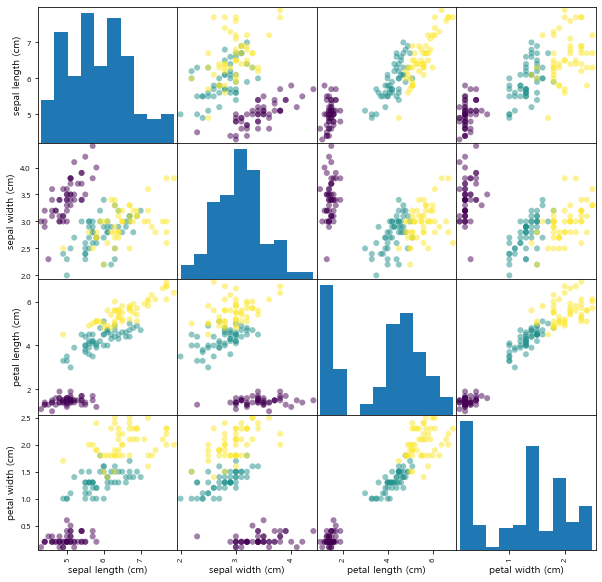

In [72]:
pd.plotting.scatter_matrix(X, figsize=(10,10),c = np.array(y) ,marker="o" )
plt.show()
# 대각 행렬은 분포도 (바그래프)
# 보라색 - setosa 
# 붓꽃을 분간하는데 꽃의 길이, 넓이가 더 중요하다는것을 알 수 있다.

### 모델 선언


In [73]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)

c:\Users\user\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [75]:
metrics.accuracy_score(pred, y_test)

0.9736842105263158

### 최적의 HyperParameter 찾아보기

  0%|          | 0/99 [00:00<?, ?it/s]c:\Users\user\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\user\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

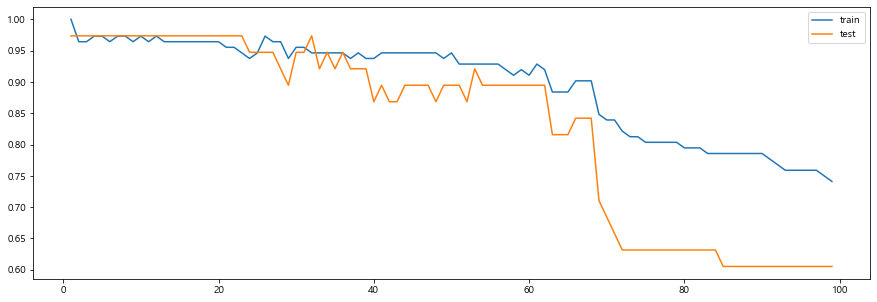

In [77]:
train_list = []
test_list = []

for i in tqdm(range(1,100)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_list.append( model.score(X_train, y_train))
    test_list.append(model.score(X_test, y_test))

plt.figure(figsize = (15,5))
plt.plot(range(1,100), train_list, label = "train")
plt.plot(range(1,100), test_list, label = "test")
plt.legend(loc = "upper right") 
plt.show()   